In [1]:
#!pip install -U imbalanced-learn

Имеется датасет, полученный в ходе исследования факторов, способных повлиять на депрессию людей, живущих в сельской местности. Задача модели ML --- научиться определять склонность к депрессии (0 --- не страдает, 1 --- страдает). Это типичная задача **бинарной классификации**. Hассмотрим одну из популярных моделей для этой задачи --- логистическую регрессию.

# Логистическая регрессия


Так сложилось, что в задачах бинарной классификации мы большее значение придаём тому, чтобы научиться определять класс 1, нежели класс 0. Класс 1 представляет собой в каком-то смысле "редкое" событие: письмо со спамом, неплатёжеспособность клиента, наличие заболевания, склонность к депрессии. Будем называть его "положительным" классом, а класс 0 --- "отрицательным". Во многих ситуациях нам важнее знать **оценку вероятности** того, что объект попадёт в положительный класс (вероятность невозврата кредита, вероятность заболевания, вероятность склонности к депрессии). Тогда, задавая различные пороги для этой вероятности (в зависимости от задачи), мы будем таким образом разделять объекты.

Обозначим вероятность положительного события через $P_+$. Очевидно, что вероятность противоположного класса тогда равна $(1-P_+)$. Составим величину, называемую odds ratio ("отношение шансов"):

$$
OR = \frac{P_+}{1-P_+}.
$$

$OR$ показывает отношение вероятностей того, произойдёт наше событие или не произойдёт. При этом величины $P_+$ и $OR$ содержат, по сути, одинаковую информацию. Но если $P_+\in(0; 1)$, то $OR\in(0; +\infty)$. Если теперь рассмотреть величину логарифма отношения шансов $\log OR$, то мы придём к тому, что $\log OR\in(-\infty; +\infty)$. И вот мы получили, что можем прогнозировать **вероятность**, прогнозируя величину, лежащую от минус до плюс бесконечности! А эту величину можно предсказывать с помощью **регрессионной модели**. 

## Сигма-функция

Пусть теперь мы прогнозируем $\log OR$ с помощью линейной регрессии: $\log OR=\mathbf{w}^T\mathbf{x}$. Как из этой величины получить $P_+$?

$$
P_+ = \frac{OR}{1+OR} = \frac{e^{\log OR}}{1+e^{\log OR}}=\frac{e^{\mathbf{w}^T\mathbf{x}}}{1+e^{\mathbf{w}^T\mathbf{x}}}=\frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}}.
$$

Интересно, что мы получили здесь довольно важную функцию в машинном обучении (нет, на этот раз не логарифм :)):

$$
\sigma(z) = \frac{1}{1+e^{-z}},
$$

называемую сигма-функцией, или сигмоидой, или **логистической функцией**. Она ведёт себя так:
![](https://www.researchgate.net/profile/John_Davis82/publication/234049070/figure/fig6/AS:300093912698893@1448559372458/Logistic-sigmoid-function-Maps-real-numbers-to-the-interval-between-0-and-1.png)

Итак, $P_+=\sigma(\mathbf{w}^T\mathbf{x})$. Это важный результат.

Тем самым, с помощью логистической регрессии мы будем прогнозировать **вероятность принадлежности объекта к классу 1**.

## LogLoss, или логистическая функция потерь

Следующий важный момент: **как считать ошибку модели в случае бинарной классификации**? Иными словами, как выбрать функцию потерь и составить функционал качества?

Вновь вспомним принцип максимального правдоподобия. Только что мы получили, что

$$
P_+ = P(y=1 | \mathbf{x}_i, \mathbf{w}) = \sigma(\mathbf{w}^T\mathbf{x}).
$$

Но тогда

$$
P_- = P(y=-1 | \mathbf{x}_i, \mathbf{w}) = 1 - P_+ = 1 - \sigma(\mathbf{w}^T\mathbf{x}_i).
$$

Здесь мы обозначили класс "0" как "-1" для удобства выкладок. Далее можно заметить (проверьте!), что $1 - \sigma(\mathbf{w}^T\mathbf{x}_i)=\sigma(-\mathbf{w}^T\mathbf{x}_i)$: первое из поразительных свойств сигмоиды --- то ли ещё будет! Учитывая последнее, можно записать **общую формулу** для вероятности:

$$
P(y=y_i | \mathbf{x}_i, \mathbf{w}) = \sigma(y_i\mathbf{w}^T\mathbf{x}_i).
$$

Тогда вероятность всей выборки (взятой независимо и из одного распределения) запишется как произведение вероятностей:

$$
P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \prod_{i=1}^{l} P(y=y_i | \mathbf{x}_i, \mathbf{w}).
$$

Это **функция правдоподобия выборки**. Её нужно максимизировать. Как обычно, вместо максимизации произведения множества слагаемых нам бы хотелось максимизировать сумму. Поэтому возьмём логарифм правдоподобия:

$$
\begin{multline*}
\log P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \log \prod_{i=1}^{l} P(y=y_i | \mathbf{x}_i, \mathbf{w}) = 
\sum_{i=1}^{l} \log P(y=y_i | \mathbf{x}_i, \mathbf{w}) = \\
=\sum_{i=1}^{l} \log \sigma(y_i\mathbf{w}^T\mathbf{x}_i) = \sum_{i=1}^{l} \log \frac{1}{1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}}=-\sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right) \to \max\limits_\mathbf{w},
\end{multline*}
$$

то есть максимизация прадоподобия эквивалентна минимизации функционала

$$
Q(\mathbf{w}) = \sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right) \to \min\limits_\mathbf{w}.
$$

Последний функционал под знаком суммы содежит **логистическую функцию потерь**, или лог-лосс: $L_{log}(z)=\log(1+e^{-z})$. Её график выглядит следующим образом:
![](https://www.researchgate.net/profile/Thomas_Hofmann10/publication/2877976/figure/fig1/AS:650449568923660@1532090670890/Loss-values-of-0-1-exp-and-log-loss-functions-in-a-binary-classification-problem.png)

и мажорирует обычную пороговую функцию потерь:
$$
L(y, \widehat{y}) = \begin{cases}0, & \text{if } y=\widehat{y}, \\ 1, & \text{if } y\neq\widehat{y}. \end{cases}
$$

Итак, мы только что показали, что, с точки зрения статистики и метода максимального правдоподобия, **оптимальным выбором функции потерь** для логистической регрессии является **лог-лосс**, или **логистическая функция потерь**. Минимизируя лог-лосс, мы тем самым уменьшаем число ошибок классификации.

## Регуляризация логистической регрессии

В моделях логистической регрессии, как и в линейной регрессии, используют разные типы **регуляризации** ($L_1$, $L_2$, Elastic Net) для уменьшения переобучения модели. Функционал качества в случае $L_2$-регуляризации выглядит так:

$$
Q_{reg}(\mathbf{w}) = C\cdot \sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right)+\|\mathbf{w}\|^2 \to \min\limits_\mathbf{w}.
$$

Здесь гиперпараметр $C>0$ играет роль **обратной силы регуляризации**. Чем больше $C$, тем меньше "штраф" за увеличение весов модели. И наоборот, чем меньше $C$, тем эффект регуляризации больше.

## Почему логистическая регрессия --- это линейный классификатор?

Мы ещё не обсудили вопрос, почему же рассмотренная нами модель относится к **линейным моделям**. Для этого рассмотрим игрушечный пример с точками на плоскости.

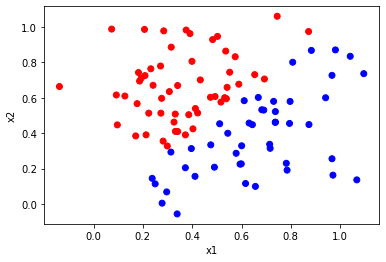

In [2]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
X = np.random.normal(loc=0.5, scale=0.25, size=(100, 2))
y = (X[:, 1] > X[:, 0]).astype('int') # разделяющая граница: y=x (биссектриса первой четверти)
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in y])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

w = log_reg.coef_
bb = log_reg.intercept_

print(w, bb)

[[-3.29153106  3.02599673]] [0.23181665]


Построим разделяющую границу между классами, которую "выучила" наша модель. Для этого запишем уравнение
$$
w_1\cdot x_1 + w_2\cdot x_2 + b = 0
$$
и выразим из него $x_2$ для более привычного построения графика:
$$
x_2 = -\frac{w_1}{w_2}x_1-\frac{b}{w_2}.
$$

In [4]:
w1 = w[0][0]
w2 = w[0][1]
b = bb[0]

print('w1 = '+str(w1), '\nw2 = '+str(w2), '\nb = '+str(b))

w1 = -3.2915310634294577 
w2 = 3.025996731477562 
b = 0.23181664725328535


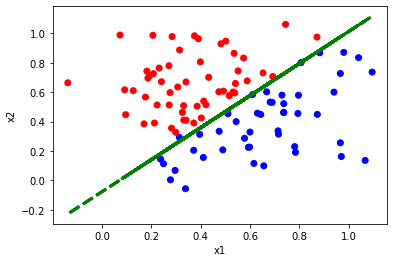

In [5]:
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in y])
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2, color='green', linewidth=3, linestyle="dashed")

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Итак, модель логистической регрессии почти идеально восстановила нашу разделяющую границу. А что будет, если разделяющая граница нелинейна?

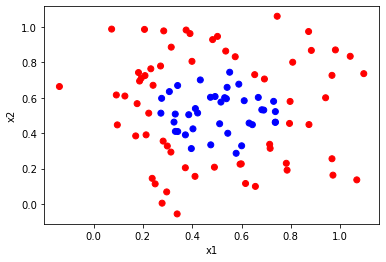

In [6]:
yy = ((X[:, 0]-0.5)**2 + (X[:, 1]-0.5)**2 > 0.25**2).astype('int')
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in yy])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Теперь посмотрим, что выучит наша модель.

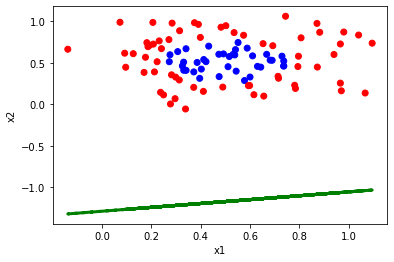

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X, yy)

w1 = log_reg.coef_[0][0]
w2 = log_reg.coef_[0][1]
b = log_reg.intercept_[0]

plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in yy])
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2, color='green', linewidth=3, linestyle="dashed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Как видим, несмотря на изменения в исходных данных, модель по-прежнему "учит" только линейную границу между классами, причём в данном случае далеко от идеала.

Тем не менее, в многомерных пространствах картинка получается лучше, и даже линейный классификатор способен дать хороший результат. Кроме того, мы можем использовать приём, который называется **"создание полиномиальных признаков"**. Это означает, что, помимо $x_1, x_2, \ldots, x_n$, модель также рассматривает их попарные произведения степени не выше $k$ (в случае $k=2$ это будут $x_1^2$, $x_1x_2$, $x_2^2$) в качестве признаков. Этот приём описан в [статье](https://habr.com/ru/company/ods/blog/323890/) OpenDataScience-сообщества (раздел 4). 

# Логистическая регрессия в действии

## Загрузка и препроцессинг

In [8]:
import pandas as pd
dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv'
#df = pd.read_csv(dataset, names=['date', 'quarter', 'quarter', 'department', 'day', 'team', 
                                 #'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 
                                 #'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity'])
df = pd.read_csv(dataset)
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
df = df.fillna('No')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   object 
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [11]:
df['date'].unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

In [12]:
df['quarter'] = df['quarter'].replace('Quarter1', 0)
df['quarter'] = df['quarter'].replace('Quarter2', 1)
df['quarter'] = df['quarter'].replace('Quarter3', 2)
df['quarter'] = df['quarter'].replace('Quarter4', 3)
df['quarter'] = df['quarter'].replace('Quarter5', 4)

df['department'] = df['department'].replace('sweing', 0)
df['department'] = df['department'].replace('finishing ', 1)
df['department'] = df['department'].replace('finishing', 1)

df['day'] = df['day'].replace('Thursday', 0)
df['day'] = df['day'].replace('Saturday', 1)
df['day'] = df['day'].replace('Sunday', 2)
df['day'] = df['day'].replace('Monday', 3)
df['day'] = df['day'].replace('Tuesday', 4)
df['day'] = df['day'].replace('Wednesday', 5)

df['wip'] = df['wip'].replace('No', 0)
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int64         
 2   department             1197 non-null   int64         
 3   day                    1197 non-null   int64         
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [14]:
df.nunique()

date                      59
quarter                    5
department                 2
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      549
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

Все столбцы числовые, однако данные всё ещё не готовы к построению модели. Нам необходимо:
* убрать пропуски (в столбце **no_lasting_investmen**);
* убрать лишний признак **Survey_id** (номер опроса);
* перевести категориальные признаки в бинарные (get_dummies);
* стандартизировать признаки с неудобным масштабом.

In [15]:
df.isnull().sum()#проверка на наличие пропусков(их нет)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [62]:
# Удалим пропуски
df_1 = df.dropna()

# Дропнем ненужные столбцы
df_2 = df_1.drop(['no_of_style_change', 'date'], axis=1)

# Переведём признаки "Номер виллы" и "Уровень образования" в бинарные 
# * мы не уверены на 100 %, что уровень образования ранговый, поэтому считаем его категориальным
#df_3 = pd.get_dummies(df_2, columns=['Insulin','Pregnancies'])

# Масштабирование
#col_names = df.columns.values # это имена всех столбцов
#large_numbers = [col for col in col_names if df[col].mean() > 100] # имена тех, у кого среднее > 10000
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_st = scaler.fit_transform(df_3[large_numbers])

# Переприсвоим старым колонкам новые
#df_3[large_numbers] = X_st

df_2.head(100)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
0,0,0,0,8,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725
1,0,1,0,1,0.75,3.94,0.0,960,0,0.0,0,8.0,0.886500
2,0,0,0,11,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570
3,0,0,0,12,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570
4,0,0,0,6,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,4,12,0.80,11.61,1101.0,5310,50,0.0,0,31.5,0.800141
96,0,0,4,7,0.80,25.90,1035.0,10170,38,0.0,0,56.5,0.800129
97,0,0,4,8,0.80,25.90,1083.0,10170,38,0.0,0,56.5,0.800129
98,0,0,4,6,0.80,11.61,910.0,4470,38,0.0,0,31.5,0.800077


In [63]:
#df1 = pd.read_csv('b_depressed.csv')
#df1.head()

## Построение модели и валидация

In [64]:
X = df_2
y = df_1['no_of_style_change']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

In [65]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.8666666666666667


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Метрики на основе confusion matrix

Разберёмся, так ли хороша наша модель, как кажется (accuracy=84.7 %). Для начала посмотрим на соотношение классов в задаче.

In [66]:
y.value_counts(normalize=True)

0    0.877193
1    0.095238
2    0.027569
Name: no_of_style_change, dtype: float64

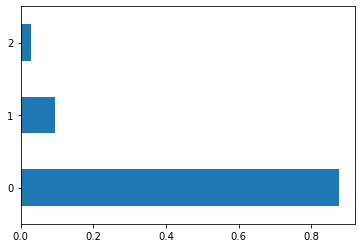

In [67]:
y.value_counts(normalize=True).plot(kind='barh')
plt.show()

Мы видим, что объектов класса 0 в выборке значительно больше (83.3 %), чем объектов класса 1. Если бы мы решили построить константный классификатор, который предсказывает 0 ВСЕГДА, то accuracy такого классификатора была бы примерно 83.3 %. Из этого можно сделать вывод, что accuracy --- далеко не лучший выбор метрики качества для случая несбалансированных классов.

Какие же есть альтернативы? Прежде всего, это матрица ошибок (confusion_matrix). В ней по строкам расположены истинные значения классов, а по столбцам --- предсказанные моделью. Их обычно обзначают так:
$$
\text{Confusion_Matrix}=
\begin{array}{c|cc} 
& \text{0_pred} & \text{1_pred} \\ \hline
\text{0_true} & TN & FP \\ 
\text{1_true} & FN & TP\end{array}
$$

Здесь:
* $TN$ --- True Negative (правильный отрицательный) --- количество объектов класса 0, которые модель опознала верно;
* $TP$ --- True Positive (правильный положительный) --- количество объектов класса 1, которые модель опознала верно;
* $FP$ --- False Positive (ложный положительный) --- количество объектов класса 0, которые модель ошибочно отнесла к классу 1;
* $FN$ --- False Negative (ложный отрицательный) --- количество объектов класса 1, которые модель ошибочно отнесла к классу 0.

В идеальном случае данная матрица содержит нули вне главной диагонали. На практике же, в зависимости от задачи, мы бы хотели **минимизировать** значения $FN$ либо $FP$. К примеру, в задаче обнаружения спама нам бы не хотелось, чтобы модель помечала как спам нормальные письма, т. е. хотим как можно меньше **ложных срабатываний** (False Positive). В задаче же медицинской диагностики куда важнее не пропустить больных (т. е. нужно минимизировать **пропуски класса 1**, False Negative).

Построим такую матрицу в нашей задаче обнаружения склонности к депрессии.

In [68]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_valid, y_pred))

[[250   8   1]
 [ 25  10   0]
 [  5   1   0]]


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


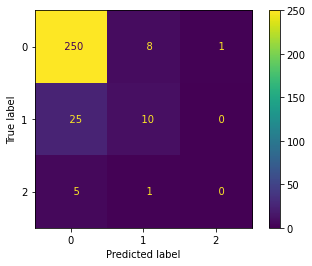

In [69]:
plot_confusion_matrix(log_reg, X_valid, y_valid, values_format='5g')
plt.show()

Итак, наша модель определяет 4 человек как склонных к депрессии (в то время как они "здоровы"), а также 50 человек помечает "здоровыми", в то время как они склонны к депрессии. Последнее обстоятельство явно не очень хорошо. Ведь всего у нас было 52 случая склонности к депрессии, из которых модель сумела найти только два!

### Точность, полнота и F-мера

На основе матрицы ошибок можно построить следующие три метрики, каждая из которых лучше отображает результаты классификации для несбалансированных классов. Это **точность** (precision), **полнота** (recall) и **F-мера** (f1_score).

$$
\text{Confusion_Matrix}=
\begin{array}{c|cc} 
& \text{0_pred} & \text{1_pred} \\ \hline
\text{0_true} & TN & FP \\ 
\text{1_true} & FN & TP\end{array}
$$

* $\text{Precision}=\dfrac{TP}{TP+FP}$: показывает, насколько можно "доверять" модели, если она показала класс 1;
* $\text{Recall}=\dfrac{TP}{TP+FN}$: показывает, как хорошо модель умеет находить класс 1;
* $F_1=\dfrac{2\cdot \text{Precision}\cdot \text{Recall}}{\text{Precision}+\text{Recall}}$: гармоническое среднее между точностью и полнотой.

Таким образом, 
* если мы хотим минимизировать $FP$, то лучше в качестве метрики брать precision;
* если мы хотим минимизировать $FN$, то лучше в качестве метрики брать recall;
* если мы сомневаемся или хотим минимизировать оба значения, лучше подойдёт f1_score.

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_valid, y_pred, average='weighted'))
print('Recall:', recall_score(y_valid, y_pred, average='weighted'))
print('F1 score:', f1_score(y_valid, y_pred, average='weighted'))

Precision: 0.8322368421052632
Recall: 0.8666666666666667
F1 score: 0.8440756774090107


## Настройка гиперпараметров логистической регрессии по f1_score

Попробуем настроить параметр C (силу регуляризации) для каждого типа регуляризации.

### Регуляризация L2 (по умолчанию)

In [71]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='saga')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1_weighted')
logreg_grid.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacond

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1_weighted')

In [72]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 0.1}
0.8282992309469079


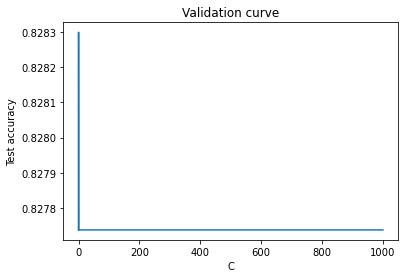

In [73]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

### Регуляризация L1

In [74]:
log_reg = LogisticRegression(solver='saga', penalty='l1')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1_weighted')
logreg_grid.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacond

GridSearchCV(cv=5, estimator=LogisticRegression(penalty='l1', solver='saga'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1_weighted')

In [75]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 0.004641588833612777}
0.8277375460119334


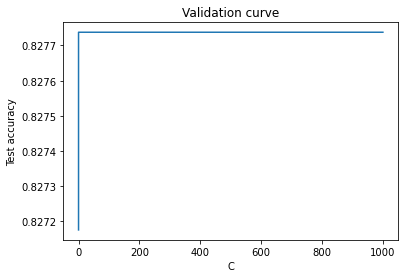

In [76]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [77]:
y_pred = logreg_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred, average='weighted' ))

[[255   0   4]
 [ 34   0   1]
 [  6   0   0]]
F1 score valid: 0.7947653429602889


Стала ли наша модель лучше? Однозначно сказать трудно :)

Однако уже понятно, что модель недообучена (слабый результат на train + слабый результат на valid). Возможно, в неё стоит добавить полиномиальные фичи. Но тогда возникнет проблема: число признаков больше числа объектов. Другая возможная причина: у нас просто мало данных (всего около 1400 объектов).

# Попытки улучшить модель

In [78]:
# kNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred, average='weighted'))

[[250   9   0]
 [ 28   6   1]
 [  6   0   0]]
F1 score valid: 0.8229662369551872


In [79]:
knn_params = {'n_neighbors': np.arange(1, 50, 2)}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1_weighted')
knn_grid.fit(X_train, y_train)

y_pred = knn_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred, average='weighted'))

[[252   6   1]
 [ 32   3   0]
 [  6   0   0]]
F1 score valid: 0.80847739692002


In [80]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred,  average='weighted'))

[[258   1   0]
 [ 10  24   1]
 [  3   1   2]]
F1 score valid: 0.941220469464206


In [81]:
# Искусственное добавление объектов класса 1

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [82]:
# Проверим баланс
y_ros.value_counts()

0    791
1    791
2    791
Name: no_of_style_change, dtype: int64

In [83]:
# Логистическая регрессия с добавлением класса 1
logreg_ros = LogisticRegression(solver='liblinear')
logreg_ros.fit(X_ros, y_ros)
y_pred = logreg_ros.predict(X_valid)

print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred, average='weighted'))

[[212  33  14]
 [  1  20  14]
 [  0   0   6]]
F1 score valid: 0.8345670261941449


In [84]:
# Подбор гиперпараметров
logreg_params = {'C': np.logspace(-3, 3, 10), 'penalty': ['l2', 'l1']}
logreg_grid = GridSearchCV(logreg_ros, logreg_params, cv=5, scoring='f1_weighted')
logreg_grid.fit(X_ros, y_ros)

y_pred = logreg_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred, average='weighted'))

[[210  37  12]
 [  0  22  13]
 [  0   2   4]]
F1 score valid: 0.8311779791518596


In [3]:
import pandas as pd
results ={'модели': ['kNN', 'Random Forest','Искусственное добавление объектов класса 1','гиперпараметров'],
         'F1 score':pd.Series([ 0.822, 0.941, 0.835, 0.831])}
pd.DataFrame(results)

,модели,F1 score
0,kNN,0.822
1,Random Forest,0.941
2,Искусственное добавление объектов класса 1,0.835
3,гиперпараметров,0.831


# Задание

1. Выбрать датасет https://archive-beta.ics.uci.edu/
2. Показать результаты преподавателю и получить датасет для защиты работы. Защитить нужно на паре в деть получения датасета от преподавателя.

# Ссылки:
1. https://www.kaggle.com/code/emstrakhov/ml-logistic-regression/notebook
2. https://archive-beta.ics.uci.edu/
